In [7]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
def euclidean_distance(x1, x2):
  distance = np.sqrt(np.sum((x1 - x2) ** 2))
  return distance

In [9]:
class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

In [4]:
df = pd.read_csv('glass.csv')
y = df['Type'].values
X = df.drop('Type', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

[2, 2, 2, 1, 1, 2, 1, 7, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 7, 2, 1, 1, 2, 1, 1, 7, 1, 1, 1, 2, 5, 2, 1, 2, 2, 1, 3, 7, 2, 5, 5, 2, 3, 2, 2, 2, 1, 1, 7, 1, 2, 7, 1, 1, 2, 2, 7, 1, 1, 1, 1, 2, 7, 3, 7]


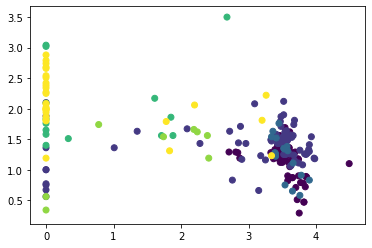

Accuracy: 0.6923076923076923


In [12]:
print(predictions)
plt.scatter(X[:,2],X[:,3],c=y)
plt.show()
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)